Example of how to apply the MIND implementation. The method is designed to work for neural time series, this example is purely for illustratory purposes. 

In [1]:
import numpy as np
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.append("../src/")
from sklearn import datasets

from mind import mind_ensemble

## Load the data

MIND assumes a temporal ordering, here we will order the samples according to their position on the manifold.

In [2]:
X, color = datasets.samples_generator.make_swiss_roll(n_samples=200)
# Sort data by position on manifold
X_sort = X[np.argsort(color)]

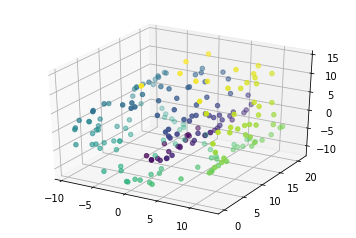

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_sort[:,0], X_sort[:,1],X_sort[:,2], c=np.arange(X.shape[0]))

## Fit MIND

The method maps original high dimensional data to lower dimensional manifold coordinates in the following steps:
1. Initialize the coordinates using Multidimensional Scaling (MDS)
2. Determine the transition probabilities between states using an ensemble of decision trees.
3. Convert the transition probabilities to distances. This is the crucial step since it means we're not using the Euclidean distance but one 'imposed by the data'
4. Find the coordinates that minimize the difference between the distances in the high dimensional (firing rate) space and the distances in the low dimensional space

The most important hyperparameters of the method are the number of manifold dimensions and the number of trees in the ensemble (more is better because it allows for more flexibility).

In [ ]:
m = mind_ensemble(X_sort, manifold_dim=2, n_trees=100, seed=123)
m.learn_coordinates()

## Visualize Result

Here you can see the output of step 2 (transition probabilities), step 3 (distances) and step 4 (coordinates). Note that there are non-zero probabilities off the diagonal. This results in manifold coordinates that do not reflect the 2 dimensional structure we would like to find.

In [ ]:
f, ax = plt.subplots(1, 2)
ax[0].imshow(m.P)
ax[1].imshow(m.D)

ax[0].set_title("Transition probabilities");
ax[1].set_title("Pairwise distances");

In [ ]:
plt.scatter(m.y[:,0], m.y[:,1], c=np.arange(X.shape[0]))
plt.xlabel("Manifold Dim. 1")
plt.ylabel("Manifold Dim. 2");